# Project Background

This database is from a cohort study of pregnant women up to 20 weeks of pregnancy and followed until delivery. Measurement of maternal visceral adipose tissue (VAT) was performed during routine obstetric ultrasound. At this time, the biometric evaluation was also performed, and information obtained from prenatal care. Gestational outcomes, including gestational diabetes mellitus (GDM), were obtained through evaluating the patients' medical records at the hospitals where they took place. The data was collected as part of a study that sought to evaluate if maternal VAT could predict GDM at time of delivery. Variables included in this dataset are maternal age, previous DM, blood pressure (in the same day of VAT measurement), VAT (in the periumbilical region), gestational age at time of inclusion, number of pregnancies, level of first fasting glucose, pre-gestational body mass index (BMI). Also, the pregnancy outcomes: gestational age at birth, type of delivery (vaginal or caesarean section), child birth weight and the diagnosis of GDM.

I have taken the goal of this project to predict the outcome of whether a patient has GDM/not based on some selected features.

## Data Pre-processing

In [1]:
#importing numpy and pandas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/visceral-adipose/visceral_fat.csv


In [2]:
# lading the dataset as a Pandas DataFrame
df = pd.read_csv("/kaggle/input/visceral-adipose/visceral_fat.csv")
df.head(10)

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,1,20,NaN,0,73.5,125.0,28.1,"12,1",1.0,NaN,33.20,"41,0",1,3840,0
1,2,28,0.0,0,75.5,112.0,43.1,"11,5",1.0,76.0,21.50,"39,1",0,2810,0
2,5,21,1.0,0,70.5,116.0,41.4,"12,6",1.0,86.0,21.41,"39,5",0,2455,0
3,9,25,0.0,0,92.5,167.0,39.6,"16,2",4.0,NaN,55.36,"39,4",0,3400,0
4,13,33,1.0,0,79.0,137.0,67.8,"11,2",2.0,86.0,30.85,"40,2",1,3930,1
5,17,18,0.0,0,67.5,111.5,26.8,"12,5",1.0,80.3,22.60,"41,0",0,2730,0
6,18,18,0.0,0,72.0,132.0,39.9,"13,1",1.0,NaN,37.18,"39,4",0,3615,0
7,19,20,1.0,0,74.5,114.0,20.6,"15,0",1.0,74.0,19.66,"40,0",0,3610,0
8,20,17,1.0,0,59.5,96.5,21.1,"13,0",1.0,78.0,15.81,"39,4",1,3460,0
9,25,23,0.0,0,90.0,126.5,25.8,"12,3",2.0,75.0,25.71,"41,0",0,3845,0


In [3]:
df.describe()

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),type of delivery,child birth weight (g),gestational dm
count,133.000000,133.000000,132.000000,133.000000,133.000000,133.000000,133.000000,128.000000,103.000000,132.000000,133.000000,133.000000,133.000000
mean,161.248120,25.804511,0.439394,0.007519,70.593985,116.578947,44.230827,2.351562,81.272816,27.871136,0.240602,3257.563910,0.135338
std,82.703505,6.366887,0.498204,0.086711,8.657662,13.879602,14.606195,1.686397,9.429794,6.874268,0.429065,490.318578,0.343378
min,1.000000,15.000000,0.000000,0.000000,51.500000,90.000000,12.700000,1.000000,60.000000,15.810000,0.000000,1105.000000,0.000000
25%,78.000000,21.000000,0.000000,0.000000,64.500000,107.000000,34.600000,1.000000,76.500000,22.550000,0.000000,2944.000000,0.000000
50%,187.000000,25.000000,0.000000,0.000000,70.000000,114.000000,42.500000,2.000000,80.000000,26.260000,0.000000,3220.000000,0.000000
75%,228.000000,30.000000,1.000000,0.000000,75.500000,125.000000,52.700000,3.000000,86.500000,30.935000,0.000000,3610.000000,0.000000
max,287.000000,43.000000,1.000000,1.000000,100.500000,167.000000,94.400000,9.000000,114.000000,55.360000,1.000000,4534.000000,1.000000


In [4]:
df.shape

(133, 15)

At first glance of the data set we can observe that "gestational age at birth" has commas in between separating weeks from days. To avoid any errors later on, we can convert it into a days only format.

In [5]:
df["gestational age at birth"] = df["gestational age at birth"].astype(str)
df["current gestational age"] = df["current gestational age"].astype(str)
df["gestational age at birth"] = df["gestational age at birth"].apply(lambda x: str(x))
df["gestational age at birth"] = df["gestational age at birth"].apply(lambda x: int(x[:1]) * 7 + int(x[-1]) )
df["current gestational age"] = df["current gestational age"].apply(lambda x: str(x))
df["current gestational age"] = df["current gestational age"].apply(lambda x: int(x[:1]) * 7 + int(x[-1]) )
df

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,1,20,NaN,0,73.5,125.0,28.10,8,1.0,NaN,33.20,28,1,3840,0
1,2,28,0.0,0,75.5,112.0,43.10,12,1.0,76.0,21.50,22,0,2810,0
2,5,21,1.0,0,70.5,116.0,41.40,13,1.0,86.0,21.41,26,0,2455,0
3,9,25,0.0,0,92.5,167.0,39.60,9,4.0,NaN,55.36,25,0,3400,0
4,13,33,1.0,0,79.0,137.0,67.80,9,2.0,86.0,30.85,30,1,3930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,278,21,0.0,0,74.5,128.5,13.90,11,2.0,81.0,21.22,24,0,3775,0
129,280,22,0.0,0,84.0,125.0,69.05,54,2.0,114.0,36.64,24,1,3565,1
130,283,19,1.0,0,76.0,140.5,52.50,14,2.0,88.0,23.62,31,1,3260,0
131,285,23,1.0,0,83.5,122.5,31.45,12,1.0,NaN,28.76,34,1,3270,0


Next, I decided to check the number of nun-null values and null values are there in each column.

In [6]:
#database information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number                         133 non-null    int64  
 1   age (years)                    133 non-null    int64  
 2   ethnicity                      132 non-null    float64
 3   diabetes mellitus              133 non-null    int64  
 4   mean diastolic bp (mmhg)       133 non-null    float64
 5   mean systolic bp (mmhg)        133 non-null    float64
 6   central armellini fat (mm)     133 non-null    float64
 7   current gestational age        133 non-null    int64  
 8   pregnancies (number)           128 non-null    float64
 9   first fasting glucose (mg/dl)  103 non-null    float64
 10  bmi pregestational (kg/m)      132 non-null    float64
 11  gestational age at birth       133 non-null    int64  
 12  type of delivery               133 non-null    int

In [7]:
# Number of null values
print(df.isnull().sum())

number                            0
age (years)                       0
ethnicity                         1
diabetes mellitus                 0
mean diastolic bp (mmhg)          0
mean systolic bp (mmhg)           0
central armellini fat (mm)        0
current gestational age           0
pregnancies (number)              5
first fasting glucose (mg/dl)    30
bmi pregestational (kg/m)         1
gestational age at birth          0
type of delivery                  0
child birth weight (g)            0
gestational dm                    0
dtype: int64


The Visceral Adipose data currently has 30 null values in the "first fasting glucose (mg/dl)" which is about 10% of the records in the dataset. Let's check if we can get any useful info from the data set, therefore I decided to impute the data with the mean. Before, I impute the data let us check if there is a difference in the baseline for the categorial variables in the dataset: "ethnicity", "diabetes mellitus", "type of delivery" and "gestational dm".

<AxesSubplot:xlabel='gestational dm', ylabel='first fasting glucose (mg/dl)'>

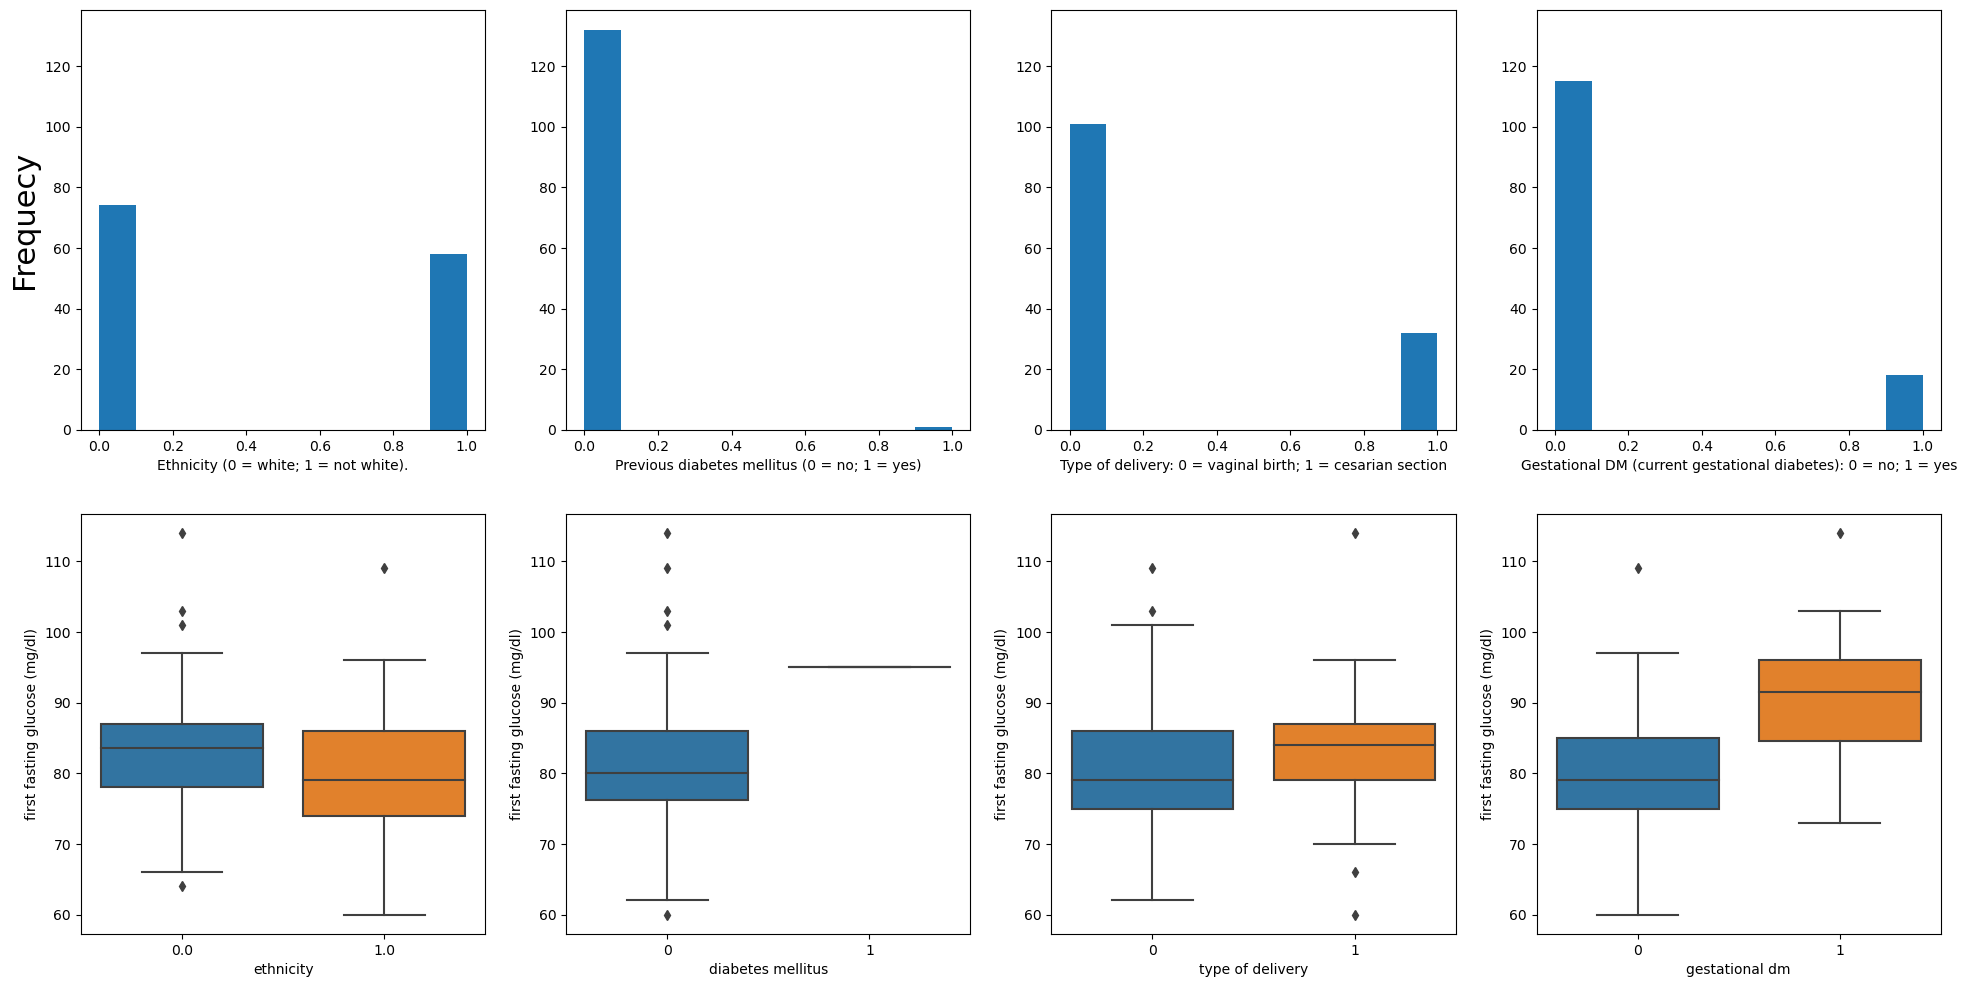

In [8]:
# Histplot of the categorical plots and box plot for vriable distributions
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2, 4, figsize=(24, 12))
ax1 = plt.subplot(2, 4, 1)
plt.hist(df["ethnicity"])
plt.xlabel("Ethnicity (0 = white; 1 = not white).")
plt.ylabel("Frequecy", fontsize = 22)
plt.subplot(2, 4, 2,sharey = ax1)
plt.hist(df["diabetes mellitus"])
plt.xlabel("Previous diabetes mellitus (0 = no; 1 = yes)")
plt.subplot(2, 4, 3, sharey = ax1)
plt.hist(df["type of delivery"]) 
plt.xlabel("Type of delivery: 0 = vaginal birth; 1 = cesarian section")
plt.subplot(2, 4, 4, sharey = ax1)
plt.hist(df["gestational dm"]) 
plt.xlabel("Gestational DM (current gestational diabetes): 0 = no; 1 = yes")
ax1 = plt.subplot(2, 4, 5)
sns.boxplot(data=df, x="ethnicity", y="first fasting glucose (mg/dl)")
ax2 = plt.subplot(2, 4, 6)
sns.boxplot(data=df, x="diabetes mellitus", y="first fasting glucose (mg/dl)")
ax2 = plt.subplot(2, 4, 7)
sns.boxplot(data=df, x="type of delivery", y="first fasting glucose (mg/dl)")
ax3 = plt.subplot(2, 4, 8)
sns.boxplot(data=df, x="gestational dm", y="first fasting glucose (mg/dl)")

Out of all the categorical variables we can clearly see there is a shift in baseline for gestational dm, and there mean values for the distribution of first fasting glucose for patients with gestational dm is higher, therefore, we can impute the values as a mode on the values for the two diestibution.

In [9]:
#imputation of values
df_gdmn = df[df["gestational dm"]==0]
df_gdmp = df[df["gestational dm"]==1]
df_n =df_gdmn["first fasting glucose (mg/dl)"].mode()
df_p =df_gdmp["first fasting glucose (mg/dl)"].mode()
for i in df.index :
    if  np.isnan(df["first fasting glucose (mg/dl)"].iloc[i]):
        if df["gestational dm"].iloc[i] == 0 :
                df["first fasting glucose (mg/dl)"].loc[i] = df_n[0]
        if df["gestational dm"].iloc[i] == 1 :
                df["first fasting glucose (mg/dl)"].loc[i] = df_p[0]
#drop remaining null values
df = df.dropna()
df

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
1,2,28,0.0,0,75.5,112.0,43.10,12,1.0,76.0,21.50,22,0,2810,0
2,5,21,1.0,0,70.5,116.0,41.40,13,1.0,86.0,21.41,26,0,2455,0
3,9,25,0.0,0,92.5,167.0,39.60,9,4.0,79.0,55.36,25,0,3400,0
4,13,33,1.0,0,79.0,137.0,67.80,9,2.0,86.0,30.85,30,1,3930,1
5,17,18,0.0,0,67.5,111.5,26.80,12,1.0,80.3,22.60,28,0,2730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,278,21,0.0,0,74.5,128.5,13.90,11,2.0,81.0,21.22,24,0,3775,0
129,280,22,0.0,0,84.0,125.0,69.05,54,2.0,114.0,36.64,24,1,3565,1
130,283,19,1.0,0,76.0,140.5,52.50,14,2.0,88.0,23.62,31,1,3260,0
131,285,23,1.0,0,83.5,122.5,31.45,12,1.0,79.0,28.76,34,1,3270,0


Now the data set has been cleaned let us begin with the explaratory analysis. Let us first see the overall spread of the data for its numerical values.

## Exploratory Analysis


Let us check how the numerical variables are distributed with respected to whether a patient has gestational dm or not.


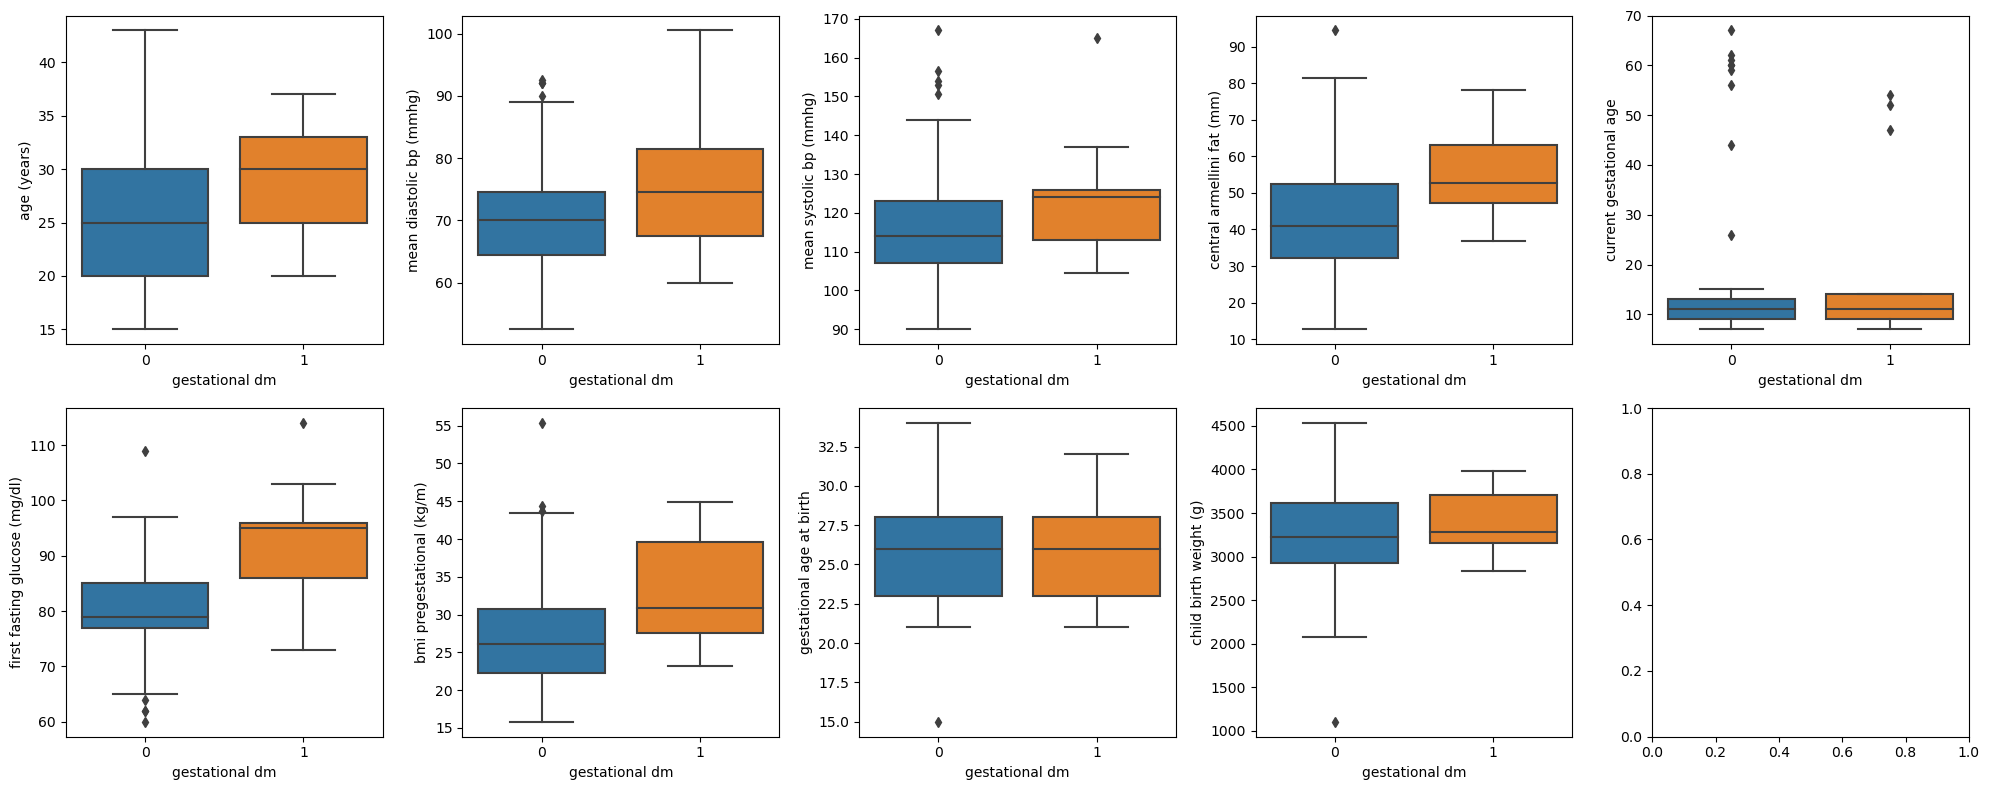

In [10]:
df_num_gdm = df[["age (years)","mean diastolic bp (mmhg)",
                 "mean systolic bp (mmhg)" ,
                 "central armellini fat (mm)", "current gestational age", 
                 "first fasting glucose (mg/dl)", "bmi pregestational (kg/m)", 
                 "gestational age at birth","child birth weight (g)", "gestational dm"]]
fig, ax = plt.subplots(2,5,figsize = (20,8))
j = 1
for i in range(9):
    plt.subplot(2,5,j)
    sns.boxplot(data=df_num_gdm,y=df_num_gdm.columns[i], x = "gestational dm")
    j += 1
fig.tight_layout()

Out of all the variable there seem to be some formation of clusters for first fasting glucose, bmi pregestational, centrail amellini fat, mean diastolic bp and age.

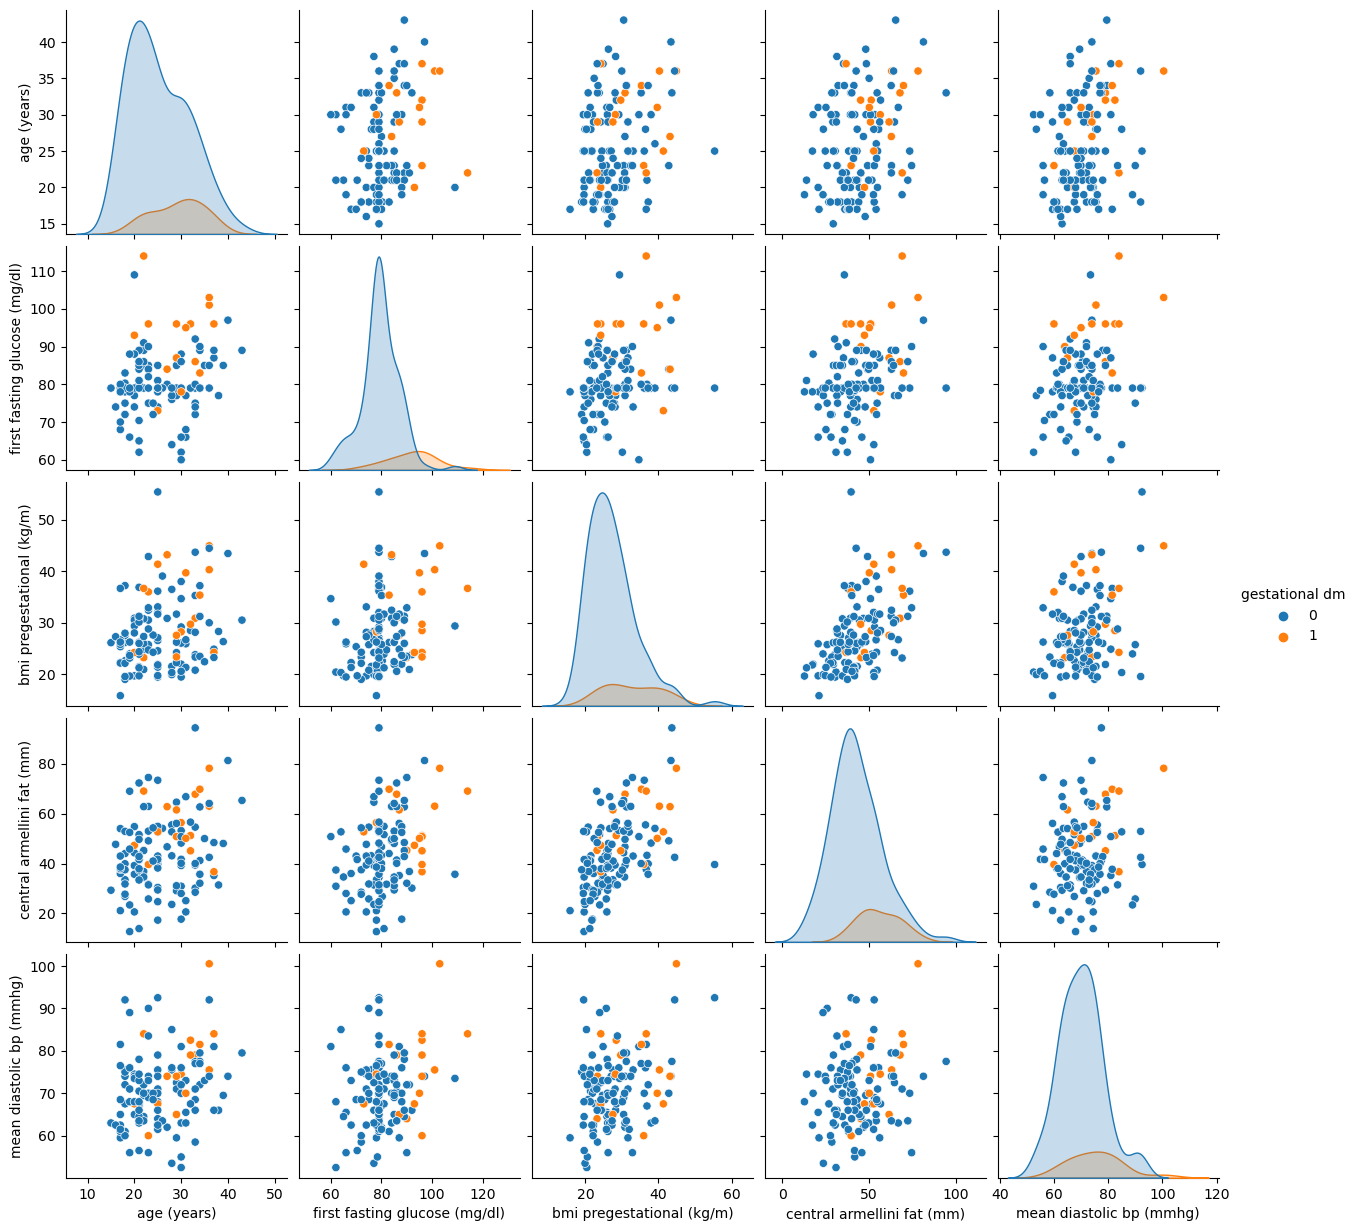

In [11]:
df_num_imp = df[["age (years)","first fasting glucose (mg/dl)", "bmi pregestational (kg/m)",
                    "central armellini fat (mm)", "mean diastolic bp (mmhg)", "gestational dm"]]
sns.pairplot(data=df_num_imp , hue = "gestational dm")

Things to note at the current stage:
(1) There are visible clusters(but overlapping) for first fsting glucose based plot which implies that first fasting glucose will be an important feature in the clssification. 
(2) The prediction class is imbalanced, so, sanity check for the models accuracy will be extremely important.

## Machine Learning


I decided to test these three following models:
1) Logistic Regression
2) Decision Tree
3) Random Forest

In [12]:
# Splitting of datset into input(X) and output(y)
X = df[["age (years)","first fasting glucose (mg/dl)", "bmi pregestational (kg/m)",
                    "central armellini fat (mm)", "mean diastolic bp (mmhg)"]]
y= df["gestational dm"]

In [13]:
# train test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
#Logistic Reg model
from sklearn.linear_model import LogisticRegression
log_reg_mod = LogisticRegression(C=10).fit(X_train, y_train)
print("Training Accuracy of Logistic Regression Model: " + str(log_reg_mod.score(X_train, y_train))[:6])
print("Testing Accuracy of Logistic Regression Model: " + str(log_reg_mod.score(X_test, y_test))[:6])
#Decision Tree Classification model
from sklearn.tree import DecisionTreeClassifier
dec_tree_model = DecisionTreeClassifier(random_state=0, max_depth = 3, max_features=4).fit(X_train, y_train)
print("Training Accuracy  of Decision Tree: " + str(dec_tree_model.score(X_train, y_train))[:6])
print("Testing Accuracy of Decision Tree: " + str(dec_tree_model.score(X_test, y_test))[:6])
#Random Forest Classification model
from sklearn.ensemble import RandomForestClassifier
rand_for_model = RandomForestClassifier(max_depth=3, random_state=0, n_estimators= 50).fit(X_train, y_train)
print("Training Accuracy  of Random ForestRandom Forest: " + str(rand_for_model.score(X_train, y_train))[:6])
print("Testing Accuracy  of Random ForestRandom Forest: " + str(rand_for_model.score(X_test, y_test))[:6])

Training Accuracy of Logistic Regression Model: 0.9
Testing Accuracy of Logistic Regression Model: 0.9230
Training Accuracy  of Decision Tree: 0.97
Testing Accuracy of Decision Tree: 0.9230
Training Accuracy  of Random ForestRandom Forest: 0.96
Testing Accuracy  of Random ForestRandom Forest: 0.9230


Out of the three methods, Random trees appears to be performing the best. Therefore, we decide to Cross-Validate our ML Decision Tree model.

In [14]:
# train test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
#kfolds cross validation on random forest
rand_for_model = RandomForestClassifier(max_depth=4, random_state=0, n_estimators= 20).fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rand_for_model,X=X_train,y=y_train, cv=5)
print("Average Accuracy: " + str(np.mean(accuracies)) )
print("Accuracy StdDev: " + str(np.std(accuracies)) )
print("Training Accuracy  of Random ForestRandom Forest: " + str(rand_for_model.score(X_train, y_train))[:6])
print("Testing Accuracy  of Random ForestRandom Forest: " + str(rand_for_model.score(X_test, y_test))[:6])

Average Accuracy: 0.89
Accuracy StdDev: 0.048989794855663536
Training Accuracy  of Random ForestRandom Forest: 0.98
Testing Accuracy  of Random ForestRandom Forest: 0.9615


Based on the cross-validation of our model we can see that it is performing well. Therefore, we can do a final evaluation of our dataset.

## Final Evaluation of the Classification Model

Since, the dataset imbalanced. Let us do a sanity check for our model but testing its performance with a dummy classifier which uses the  majority class strategy.

In [15]:
#Dummy Classification model
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
print("Training Accuracy  of Dummy Classifier: " + str(dummy_model.score(X_train, y_train))[:6])
print("Testing Accuracy  of Dummy Classifier: " + str(dummy_model.score(X_test, y_test))[:6])

Training Accuracy  of Dummy Classifier: 0.88
Testing Accuracy  of Dummy Classifier: 0.8076


Our dummy classifier performance is worse off compared to our previous classifier. THerfore, our model is valid.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

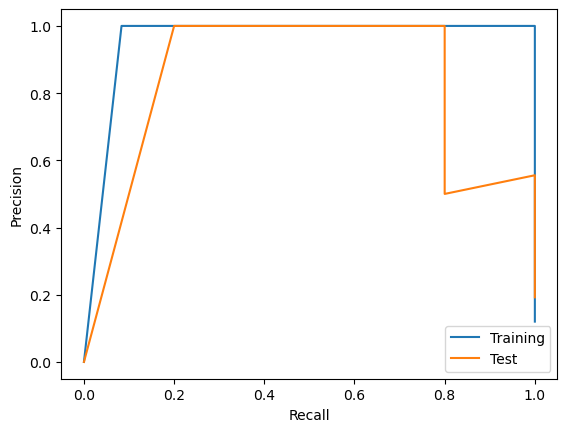

In [16]:
#plotting PR Curves
p = np.linspace(0,1,100)
prec_array_train = list()
rec_array_train = list()
prec_array_test = list()
rec_array_test = list()
acc = list()
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, accuracy_score
for i in p:
    y_pred_test = (rand_for_model.predict_proba(X_test)[:,1] >= i).astype(int)
    prec_array_test.append(precision_score(y_test, y_pred_test))
    rec_array_test.append(recall_score(y_test, y_pred_test))
    acc.append(accuracy_score(y_test, y_pred_test))
    y_pred_train = (rand_for_model.predict_proba(X_train)[:,1] >= i).astype(int)
    prec_array_train.append(precision_score(y_train, y_pred_train))
    rec_array_train.append(recall_score(y_train, y_pred_train))
prec_array_test = np.array(prec_array_test)
rec_array_test = np.array(rec_array_test)
prec_array_train = np.array(prec_array_train)
rec_array_train = np.array(rec_array_train)
#plt.plot(p,prec_array)
#plt.plot(p,rec_array)
plt.plot(rec_array_train,prec_array_train)
plt.plot(rec_array_test,prec_array_test)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(["Training", "Test"])

In [17]:
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, rand_for_model.predict(X_train),  average='binary')
f1_test = f1_score(y_test, rand_for_model.predict(X_test),  average='binary')
print("F1 Score of Training Set= "+ str(f1_train))
print("F1 Score of Test Set= "+ str(f1_test))

F1 Score of Training Set= 0.9090909090909091
F1 Score of Test Set= 0.888888888888889


Based on the Precision-Recall curve, we can maximize precision at 1 and recall of 0.6.

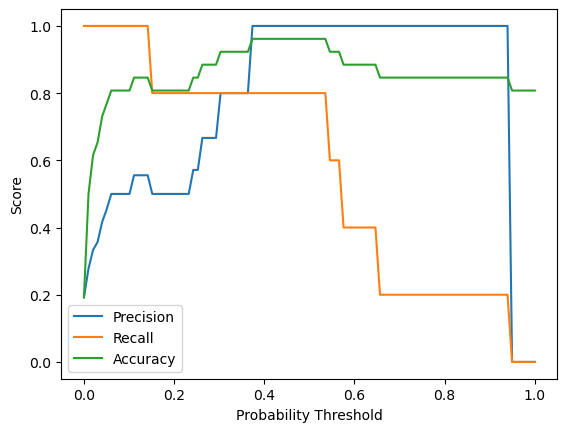

In [18]:

plt.plot(p,prec_array_test)
plt.plot(p,rec_array_test)
plt.plot(p,acc)
plt.xlabel("Probability Threshold")
plt.ylabel("Score")
plt.legend(["Precision", "Recall", "Accuracy"])

So, the default thrshold of the plot will give us a final model which is precision favored model which is suitable as for medical purpose we want to minimzie the number of false negatives. Therefore, it is important to build a model that favors recall. Therefore, we should set the thrshold to around 0.17. To minimize the number of false negatives.

## Final Thoughts

The random forest method can be used to predict whether a patient suffers from Gestational DM or not, and we maximize recall while sacrificing accuracy and precision to minimize the number of false negatives, the probability threshold can be set to 0.2.

Drawback:
(1) first fasting glucose is an important factor in prediction, therefore, it's data must be collected. However, in our case we imputaded them based on the mode which is not a very accurate method. The plot below shows the importance of first fasting glucose importance in this model.

<AxesSubplot:>

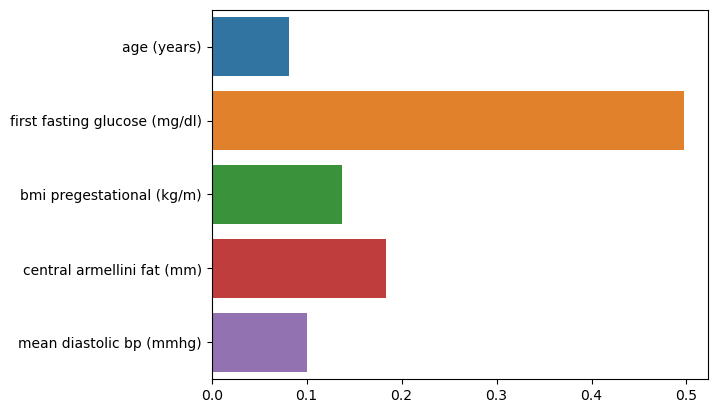

In [19]:
sns.barplot(x=rand_for_model.feature_importances_ ,y=rand_for_model.feature_names_in_, orient = "h")


In [20]:
rand_for_model._check_n_features

<bound method BaseEstimator._check_n_features of RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0)>